In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
import pandas as pd

In [5]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [6]:
XX_train=pd.read_csv('csvTrainImages 60k x 784.csv')
YY_train=pd.read_csv('csvTrainLabel 60k x 1.csv')
XX_test=pd.read_csv('csvTestImages 10k x 784.csv')
YY_test=pd.read_csv('csvTestLabel 10k x 1.csv')
X_train=np.append(np.array(XX_train).reshape([len(XX_train),28,28]),X_train,axis=0)
X_test=np.append(np.array(XX_test).reshape([len(XX_test),28,28]),X_test,axis=0)
def change_shape(YY_train,Y_train):
  test=[]
  Y_train=np.array(Y_train)
  for i in np.nditer(YY_train):test.append(i+10)
  for i in np.nditer(Y_train):test.append(i)
  return np.array(test)
Y_train=change_shape(YY_train,Y_train)
Y_test=change_shape(YY_test,Y_test)

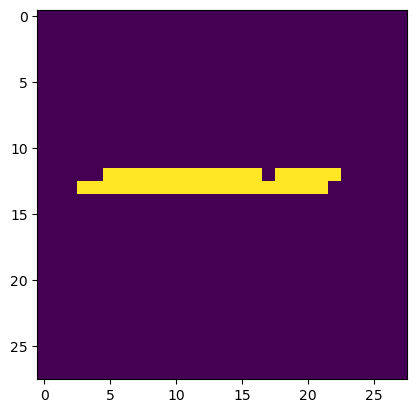

11


In [7]:
# displaying the image

plt.imshow(X_train[520])
plt.show()

# print the corresponding label
print(Y_train[520])

In [8]:
print(Y_train.shape, Y_test.shape)

(119999,) (19999,)


In [9]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [10]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [11]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(20, activation='sigmoid')
])

In [12]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(Y_train.shape)


(119999,)


In [13]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=20)

Epoch 1/20


3750/3750 [==============================] - 7s 2ms/step - loss: 0.2864 - accuracy: 0.9218
Epoch 2/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1277 - accuracy: 0.9635
Epoch 3/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0997 - accuracy: 0.9711
Epoch 4/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0826 - accuracy: 0.9754
Epoch 5/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0722 - accuracy: 0.9783
Epoch 6/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0616 - accuracy: 0.9806
Epoch 7/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0565 - accuracy: 0.9823
Epoch 8/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0497 - accuracy: 0.9845
Epoch 9/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0452 - accuracy: 0.9856
Epoch 10/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0

In [14]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy*100)

625/625 [==============================] - 1s 1ms/step - loss: 0.1423 - accuracy: 0.9721
97.2148597240448


In [15]:
print(X_test.shape)

(19999, 28, 28)


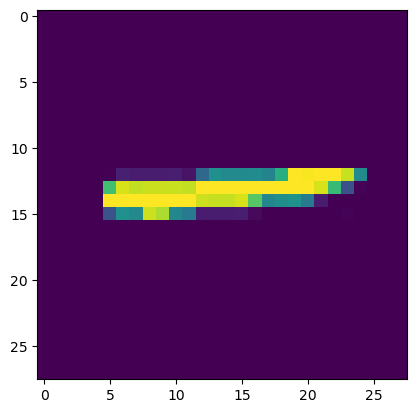

In [16]:
plt.imshow(X_test[0])
plt.show()

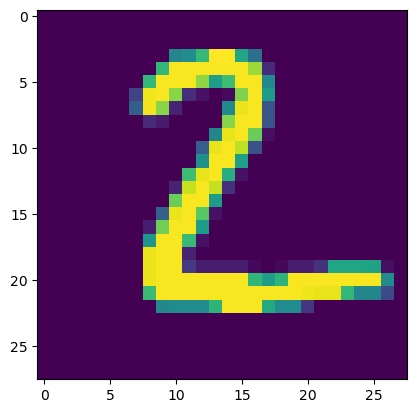

In [19]:
plt.imshow(X_test[10000])
plt.show()